In [2]:
import pandas as pd
from pathlib import Path

In [3]:
# Define path to Scorecard data
scorecard_dir = Path("../data/raw")
merged_files = sorted(scorecard_dir.glob("MERGED20*_PP.csv"))

In [4]:
# Display files detected
print("Found MERGED files:")
for f in merged_files:
    print(" -", f.name)

Found MERGED files:


In [5]:
# Dictionary to hold all crosswalk dataframes
scorecard_data = {}

In [6]:
# Output summary of each file to a text file
output_file = Path("../data/processed/scorecard_summaries.txt")
with open(output_file, "w", encoding="utf-8") as out:
    for file in merged_files:
        try:
            df = pd.read_csv(file, low_memory=False)
            out.write(f"\n{file.name} - Shape: {df.shape}\n")
            out.write("Columns:\n")
            out.write(", ".join(df.columns[:20]))  # First 20 columns
            out.write("\n\nHead:\n")
            out.write(df.head().to_string(index=False))
            out.write("\n" + "-"*80 + "\n")
        except Exception as e:
            out.write(f"Failed to load {file.name}: {e}\n")

print(f"Scorecard summaries written to: {output_file}")

Scorecard summaries written to: ../data/processed/scorecard_summaries.txt


In [7]:
# Merge all scorecard files into one dataframe
def merge_scorecard_files(file_list):
    merged_df = pd.DataFrame()
    for file in file_list:
        try:
            df = pd.read_csv(file, low_memory=False)
            year = file.stem.replace("MERGED", "").replace("_PP", "")
            df["Year"] = year
            merged_df = pd.concat([merged_df, df], ignore_index=True)
        except Exception as e:
            print(f"Failed to merge {file.name}: {e}")
    if "UNITID" in merged_df.columns:
        merged_df = merged_df.sort_values(by="UNITID").reset_index(drop=True)
    return merged_df


merged_scorecard = merge_scorecard_files(merged_files)
print(f"Merged dataset shape: {merged_scorecard.shape}")

# Saved the merged dataset into the processed directory
merged_scorecard.to_csv("../data/processed/merged_scorecard.csv", index=False)
print("Merged Scorecard dataset saved to: data/processed/merged_scorecard.csv")

Merged dataset shape: (0, 0)
Merged Scorecard dataset saved to: data/processed/merged_scorecard.csv


In [8]:
import matplotlib.pyplot as plt


In [9]:
import os

# Path to your CSV folder
csv_folder = "/Users/surgalsb/Downloads/College_Scorecard_Raw_Data_01162025/Merged"  # Update this to your actual path

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.CSV')]

# Print the list of files to verify
print(csv_files)



[]


In [10]:
import os

csv_folder = "/Users/surgalsb/Desktop/CSC302 Final/CSC302-Group10-Final/data/processed/reduced_scorecard.csv"  # Make sure this path is correct

# List the contents of the directory
print(os.listdir(csv_folder))


NotADirectoryError: [Errno 20] Not a directory: '/Users/surgalsb/Desktop/CSC302 Final/CSC302-Group10-Final/data/processed/reduced_scorecard.csv'

In [12]:
import pandas as pd
import os

# Path to your CSV folder
csv_folder = "/Users/surgalsb/Desktop/CSC302 Final/CSC302-Group10-Final/data/processed/reduced_scorecard.csv"  # Update this with your actual folder path

# List all CSV files in the folder
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]

# Initialize a list to store DataFrames
df_list = []

# Loop through each file and load it
for file in csv_files:
    # Extract the year from the file name
    year = file.split('MERGED')[1].split('_')[0]  # Extracts "2011" from "MERGED2011_12"
    
    # Full file path
    file_path = os.path.join(csv_folder, file)
    
    # Load the CSV file
    try:
        df = pd.read_csv(file_path)
        
        # Add a new column 'Year' with the extracted year
        df['Year'] = int(year)  # Convert year to integer for easier plotting
        
        # Append the dataframe to the list
        df_list.append(df)
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Check the length of the DataFrame list
print(f"Number of DataFrames loaded: {len(df_list)}")

# Combine all DataFrames into one
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    print(combined_df.head())  # Show first few rows to verify
else:
    print("No DataFrames to combine. Check if files are being loaded correctly.")


NotADirectoryError: [Errno 20] Not a directory: '/Users/surgalsb/Desktop/CSC302 Final/CSC302-Group10-Final/data/processed/reduced_scorecard.csv'

In [12]:
# Check the column names
print(combined_df.columns)


Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'COUNT_WNE_MALE1_P11', 'GT_THRESHOLD_P11', 'MD_EARN_WNE_INC1_P11',
       'MD_EARN_WNE_INC2_P11', 'MD_EARN_WNE_INC3_P11',
       'MD_EARN_WNE_INDEP0_P11', 'MD_EARN_WNE_INDEP1_P11',
       'MD_EARN_WNE_MALE0_P11', 'MD_EARN_WNE_MALE1_P11', 'Year'],
      dtype='object', length=3306)


In [13]:
# Check if 'Year' and 'TUITIONFEE_IN' columns are available and clean
print(combined_df[['Year', 'TUITIONFEE_OUT']].head())


   Year  TUITIONFEE_OUT
0  2011         12156.0
1  2011         14256.0
2  2011          8720.0
3  2011         19424.0
4  2011         14394.0


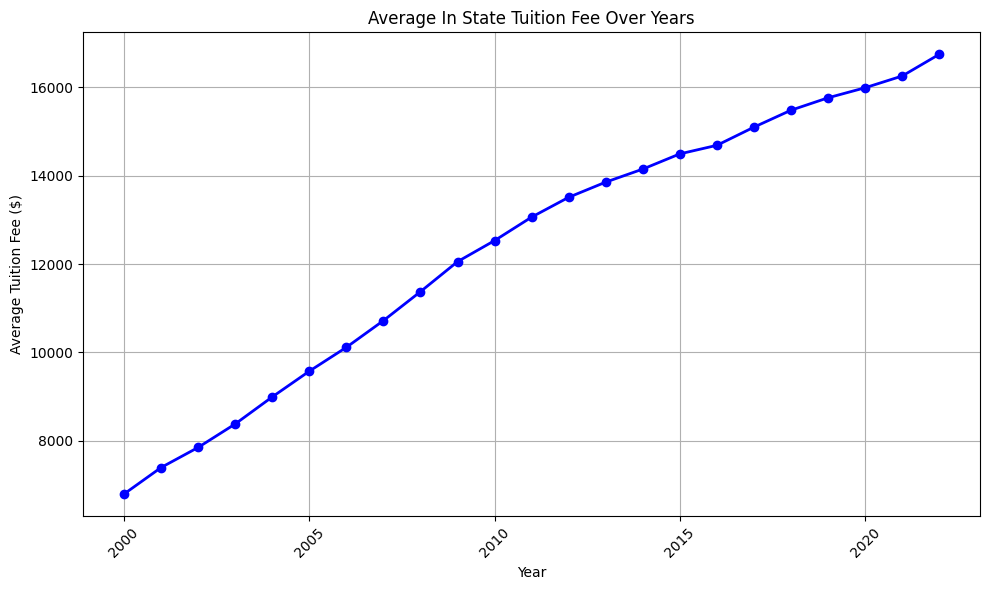

In [14]:
import matplotlib.pyplot as plt

# Group by 'Year' and calculate the mean tuition for each year
tuition_by_year = combined_df.groupby('Year')['TUITIONFEE_IN'].mean()

# Plotting
plt.figure(figsize=(10, 6))
tuition_by_year.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)
plt.title("Average In State Tuition Fee Over Years")
plt.xlabel("Year")
plt.ylabel("Average Tuition Fee ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

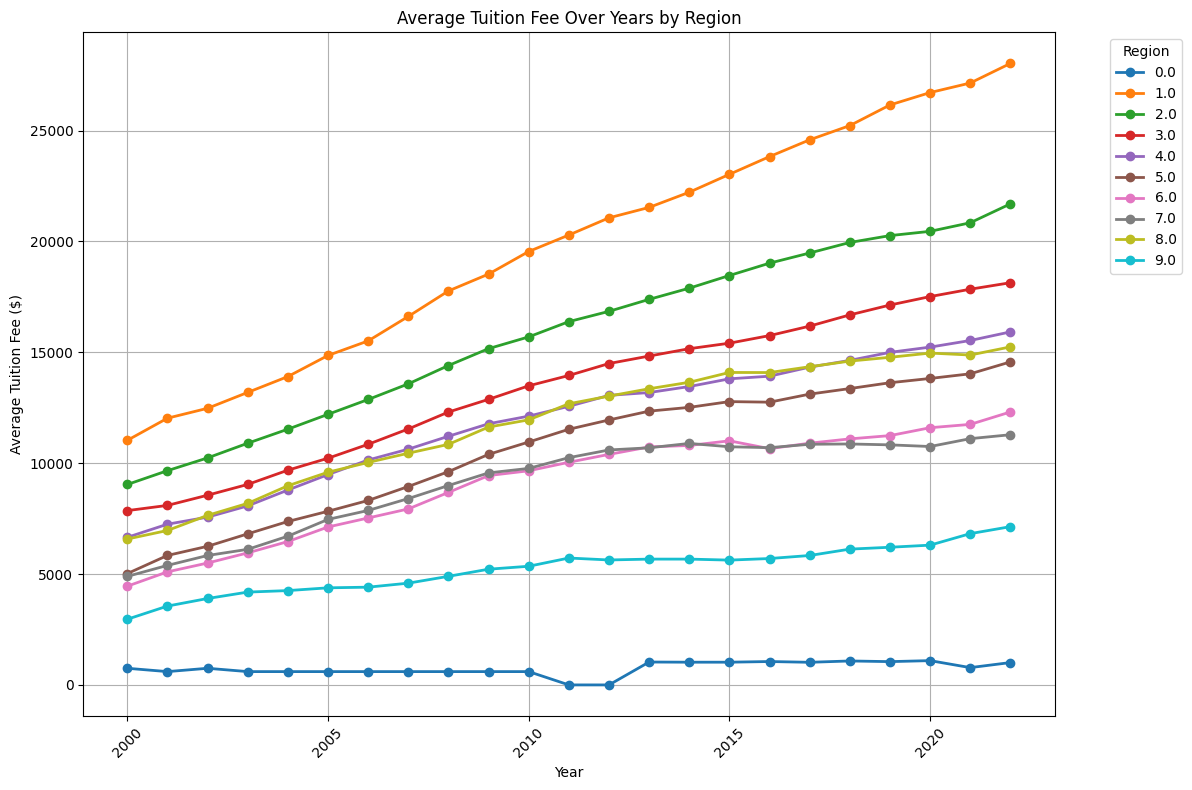

In [15]:
import matplotlib.pyplot as plt

# Group by 'Year' and 'Region', then calculate the mean tuition for each group
tuition_by_year_region = combined_df.groupby(['Year', 'REGION'])['TUITIONFEE_IN'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 8))

# Plot each region with a different color
tuition_by_year_region.plot(kind='line', marker='o', linestyle='-', linewidth=2, figsize=(12, 8))

plt.title("Average Tuition Fee Over Years by Region")
plt.xlabel("Year")
plt.ylabel("Average Tuition Fee ($)")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# Get unique regions
regions = combined_df['REGION'].unique()

# Display the unique regions and their count
print("Unique Regions:", regions)
print("Number of Regions:", len(regions))


Unique Regions: [ 5.  3.  8.  6.  0.  4.  7.  1.  2.  9. nan]
Number of Regions: 11


<Figure size 1200x800 with 0 Axes>

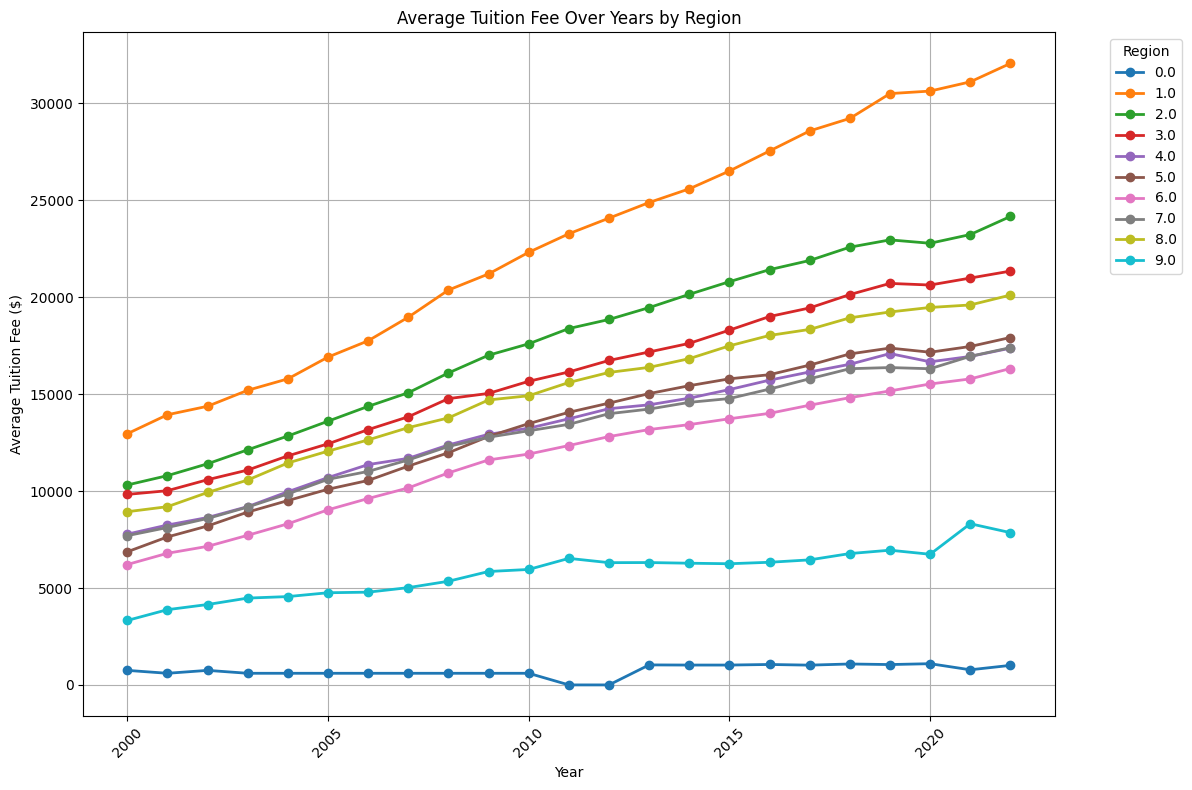

In [17]:
import matplotlib.pyplot as plt

# Group by 'Year' and 'Region', then calculate the mean tuition for each group
tuition_by_year_region = combined_df.groupby(['Year', 'REGION'])['TUITIONFEE_OUT'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 8))

# Plot each region with a different color
tuition_by_year_region.plot(kind='line', marker='o', linestyle='-', linewidth=2, figsize=(12, 8))

plt.title("Average Tuition Fee Over Years by Region")
plt.xlabel("Year")
plt.ylabel("Average Tuition Fee ($)")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

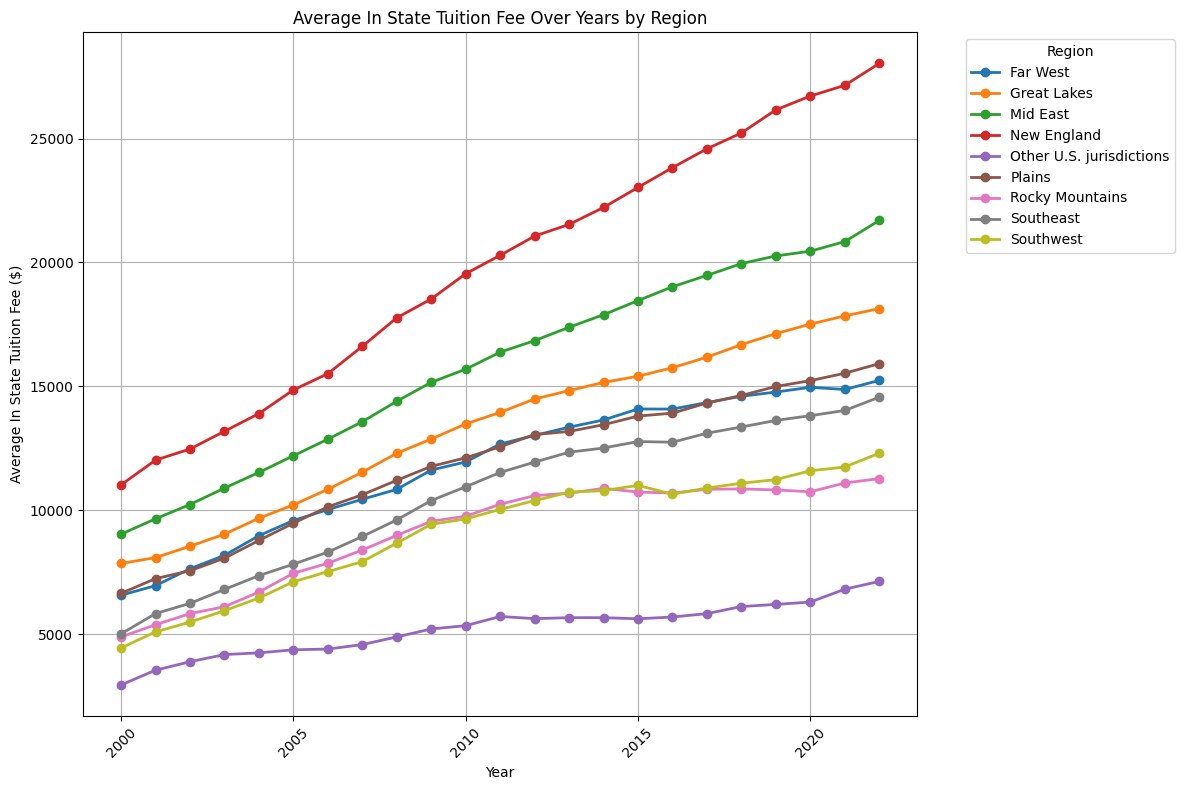

In [18]:
import matplotlib.pyplot as plt

# Create a dictionary that maps the REGION numeric values to region names
region_mapping = {
    1.0: "New England",
    2.0: "Mid East",
    3.0: "Great Lakes",
    4.0: "Plains",
    5.0: "Southeast",
    6.0: "Southwest",
    7.0: "Rocky Mountains",
    8.0: "Far West",
    9.0: "Other U.S. jurisdictions",
    10.0: "U.S. service academies"
}

# Replace the REGION numeric values with the actual region names
combined_df['REGION'] = combined_df['REGION'].map(region_mapping)

# Group by 'Year' and 'REGION', then calculate the mean tuition for each group
tuition_by_year_region = combined_df.groupby(['Year', 'REGION'])['TUITIONFEE_IN'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 8))

# Plot each region with a different color
tuition_by_year_region.plot(kind='line', marker='o', linestyle='-', linewidth=2, figsize=(12, 8))

# Add labels and title
plt.title("Average In State Tuition Fee Over Years by Region")
plt.xlabel("Year")
plt.ylabel("Average In State Tuition Fee ($)")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
combined_df['PCTFLOAN'] = pd.to_numeric(combined_df['PCTFLOAN'], errors='coerce')


In [21]:
loan_by_year = combined_df.groupby('Year')['PCTFLOAN'].mean()


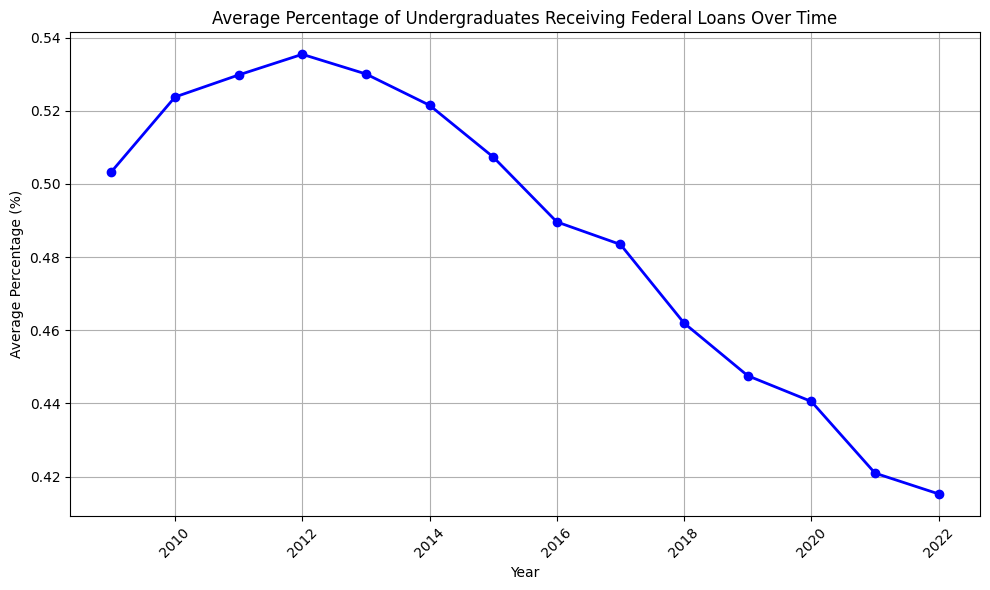

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(loan_by_year.index, loan_by_year.values, marker='o', linestyle='-', linewidth=2, color='b')

# Add labels and title
plt.title("Average Percentage of Undergraduates Receiving Federal Loans Over Time")
plt.xlabel("Year")
plt.ylabel("Average Percentage (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# Convert PCTFLOAN to numeric
combined_df['PCTFLOAN'] = pd.to_numeric(combined_df['PCTFLOAN'], errors='coerce')

# Dictionary mapping REGION codes to names
region_mapping = {
    1.0: "New England",
    2.0: "Mid East",
    3.0: "Great Lakes",
    4.0: "Plains",
    5.0: "Southeast",
    6.0: "Southwest",
    7.0: "Rocky Mountains",
    8.0: "Far West",
    9.0: "Other U.S. jurisdictions",
    10.0: "U.S. service academies"
}

# Replace numeric REGION values with actual names
combined_df['REGION'] = combined_df['REGION'].map(region_mapping)


In [24]:
loan_by_year_region = combined_df.groupby(['Year', 'REGION'])['PCTFLOAN'].mean().unstack()


In [26]:
print(loan_by_year_region.head())  # View first few rows


Empty DataFrame
Columns: []
Index: []


In [27]:
print(combined_df['PCTFLOAN'].isna().sum())  # Count missing values
print(combined_df['PCTFLOAN'].count())  # Count valid (non-null) values
print(combined_df[['Year', 'REGION', 'PCTFLOAN']].dropna().head())  # Preview non-null data


99288
90446
Empty DataFrame
Columns: [Year, REGION, PCTFLOAN]
Index: []


In [28]:
print(combined_df['PCTFLOAN'].describe())  


count    90446.000000
mean         0.489736
std          0.289901
min          0.000000
25%          0.256200
50%          0.546100
75%          0.719500
max          1.000000
Name: PCTFLOAN, dtype: float64


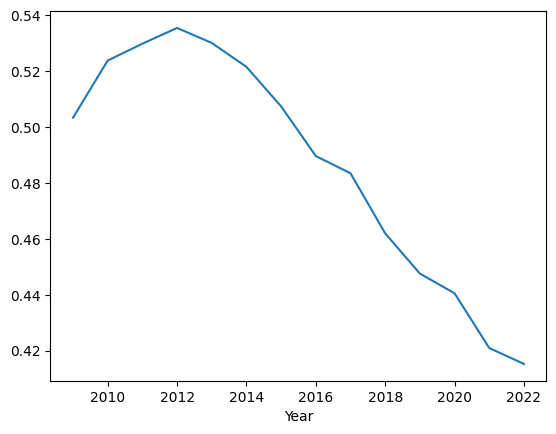

In [29]:
combined_df.groupby('Year')['PCTFLOAN'].mean().plot()
plt.show()


In [30]:
import matplotlib.pyplot as plt

# Group by 'Year' and 'REGION', then calculate the mean percent of students with federal loans
loan_by_year_region = combined_df.groupby(['Year', 'REGION'])['PCTFLOAN'].mean().unstack()

# Check if data exists
print(loan_by_year_region.head())  

if not loan_by_year_region.empty:
    plt.figure(figsize=(12, 8))
    
    # Plot each region with a different color
    loan_by_year_region.plot(kind='line', marker='o', linestyle='-', linewidth=2, figsize=(12, 8))
    
    # Add labels and title
    plt.title("Percentage of Undergraduate Students Receiving Federal Loans Over Years by Region")
    plt.xlabel("Year")
    plt.ylabel("Percentage (%)")
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available to plot!")


Empty DataFrame
Columns: []
Index: []
No data available to plot!


In [31]:
print(combined_df['PCTFLOAN'].isna().sum())  # Count missing values
print(combined_df['PCTFLOAN'].dropna().head())  # Show first few non-null values


99288
0    0.7903
1    0.5355
2    0.7415
3    0.4779
4    0.7694
Name: PCTFLOAN, dtype: float64


In [32]:
print(combined_df['PCTFLOAN'].dtype)


float64


In [33]:
print(combined_df[['Year', 'REGION']].dropna().head())


Empty DataFrame
Columns: [Year, REGION]
Index: []


In [34]:
print(combined_df.groupby(['Year', 'REGION'])['PCTFLOAN'].count().head(10))


Series([], Name: PCTFLOAN, dtype: int64)


In [35]:
print(combined_df.columns)


Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'COUNT_WNE_MALE1_P11', 'GT_THRESHOLD_P11', 'MD_EARN_WNE_INC1_P11',
       'MD_EARN_WNE_INC2_P11', 'MD_EARN_WNE_INC3_P11',
       'MD_EARN_WNE_INDEP0_P11', 'MD_EARN_WNE_INDEP1_P11',
       'MD_EARN_WNE_MALE0_P11', 'MD_EARN_WNE_MALE1_P11', 'Year'],
      dtype='object', length=3306)


In [36]:
print(combined_df['PCTFLOAN'].isna().sum())  # Count missing values
print(combined_df['PCTFLOAN'].notna().sum())  # Count non-missing values


99288
90446


In [37]:
print(combined_df[['Year', 'REGION', 'PCTFLOAN']].dropna().head(10))


Empty DataFrame
Columns: [Year, REGION, PCTFLOAN]
Index: []


In [14]:
pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


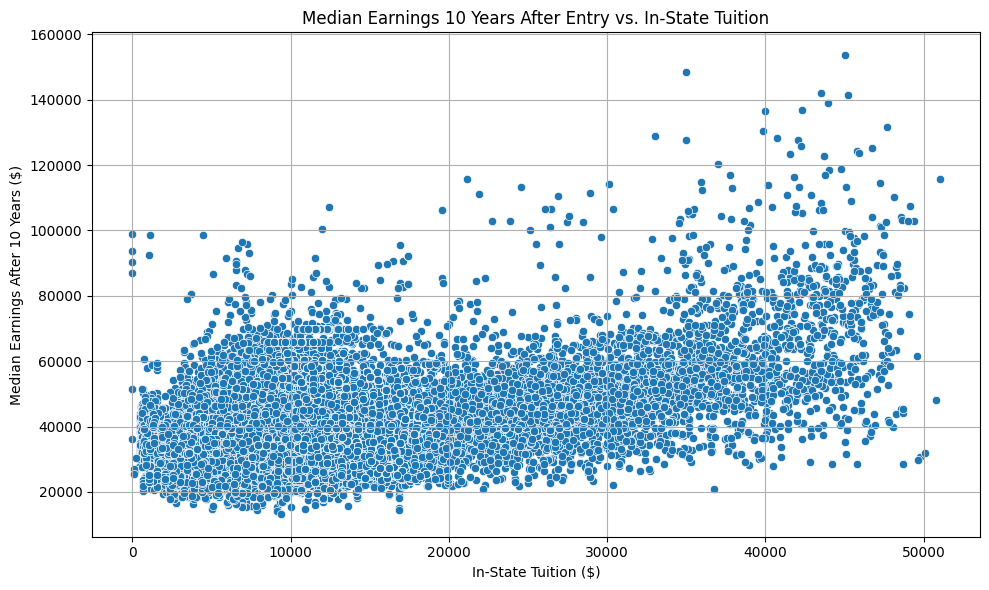

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file directly
csv_file = "/Users/surgalsb/Desktop/CSC302 Final/CSC302-Group10-Final/data/processed/reduced_scorecard copy.csv"
df = pd.read_csv(csv_file)

# Clean and filter the necessary columns
df = df[['INSTNM', 'TUITIONFEE_IN', 'MN_EARN_WNE_P10']].dropna()
df['TUITIONFEE_IN'] = pd.to_numeric(df['TUITIONFEE_IN'], errors='coerce')
df['MN_EARN_WNE_P10'] = pd.to_numeric(df['MN_EARN_WNE_P10'], errors='coerce')
df = df.dropna()

# Make the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TUITIONFEE_IN', y='MN_EARN_WNE_P10')

plt.title('Median Earnings 10 Years After Entry vs. In-State Tuition')
plt.xlabel('In-State Tuition ($)')
plt.ylabel('Median Earnings After 10 Years ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


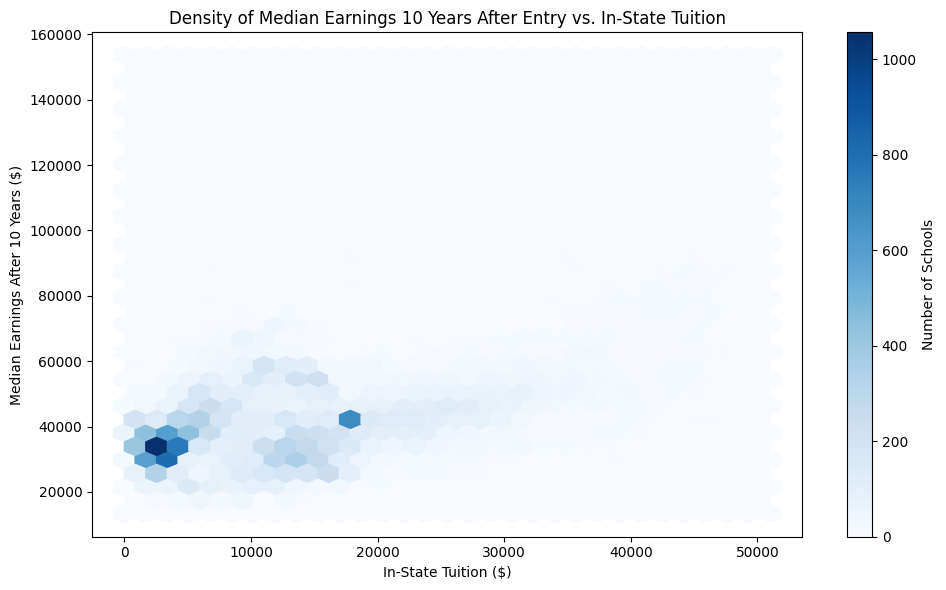

In [21]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['TUITIONFEE_IN'], df['MN_EARN_WNE_P10'], gridsize=30, cmap='Blues')
plt.colorbar(label='Number of Schools')
plt.title('Density of Median Earnings 10 Years After Entry vs. In-State Tuition')
plt.xlabel('In-State Tuition ($)')
plt.ylabel('Median Earnings After 10 Years ($)')
plt.tight_layout()
plt.show()



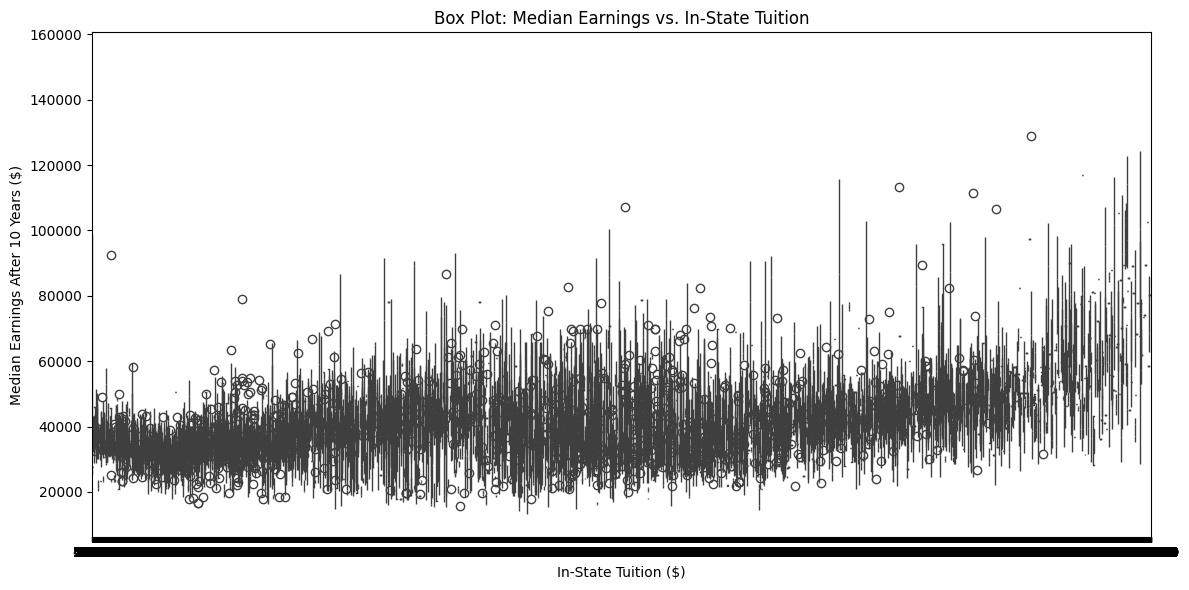

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='TUITIONFEE_IN', y='MN_EARN_WNE_P10')
plt.title('Box Plot: Median Earnings vs. In-State Tuition')
plt.xlabel('In-State Tuition ($)')
plt.ylabel('Median Earnings After 10 Years ($)')
plt.tight_layout()
plt.show()



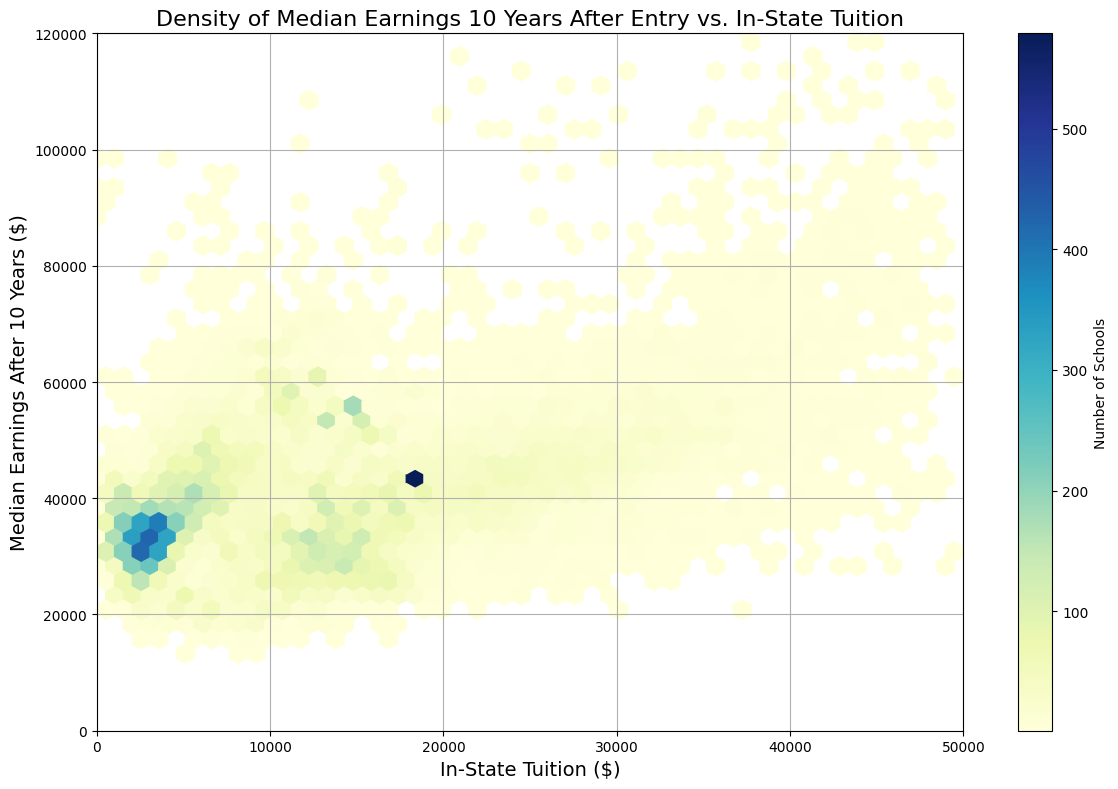

In [24]:
plt.figure(figsize=(12, 8))

# Create the hexbin plot
hb = plt.hexbin(df['TUITIONFEE_IN'], df['MN_EARN_WNE_P10'], gridsize=50, cmap='YlGnBu', mincnt=1)

# Add a color bar
cb = plt.colorbar(hb, label='Number of Schools')

# Customize the title and labels
plt.title('Density of Median Earnings 10 Years After Entry vs. In-State Tuition', fontsize=16)
plt.xlabel('In-State Tuition ($)', fontsize=14)
plt.ylabel('Median Earnings After 10 Years ($)', fontsize=14)

# Optionally set axis limits if needed (you can adjust these)
plt.xlim(0, 50000)  # Example to limit tuition
plt.ylim(0, 120000)  # Example to limit earnings

# Add grid for better readability
plt.grid(True)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
